In [2]:
% matplotlib inline
import pandas as pd
from pandas import Series, DataFrame

In [91]:
ttn_df = pd.read_csv('train.csv')

### simplest, fastest way to get a general idea of the data set:
> * DataFrame.head() 
> * DataFrame.info() 
> * DataFrame.describe()

#### individual statistics can be obtained by 
> * DataFrame.mean()/std()/count() etc
> * Series.value_counts()

In [92]:
ttn_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [93]:
ttn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [125]:
ttn_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [130]:
ttn_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
person         891
survivor       891
level          891
dtype: int64

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### plot counts:
> * seaborn.countplot()
> * seaborn.factorplot(kind='count')

#### degree of freedoms:
> * *arg1
> * hue 
> * col

#### ordering plots: 
> * order
> * set(alist) gives the unique sorted value set of a list

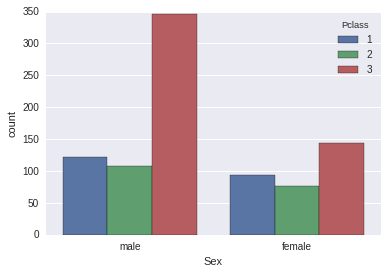

In [95]:
sns.countplot(x='Sex',data=ttn_df, hue='Pclass')

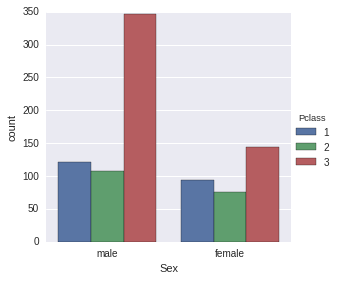

In [55]:
sns.factorplot('Sex',data=ttn_df,hue='Pclass', kind='count')

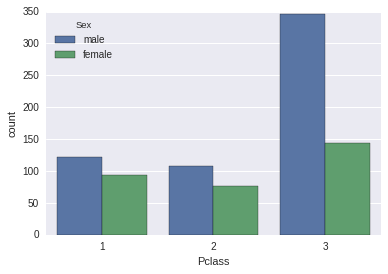

In [56]:
sns.countplot(x='Pclass',data=ttn_df, hue='Sex')

### DataFrame.apply()
#### apply() seems to apply the function iteratively to the entries of the dataframe that called it. So that the input of applied function should be a specific row of the dataframe instead of the whole dataframe

In [96]:
def mfc(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [97]:
ttn_df['person'] = ttn_df[['Age','Sex']].apply(mfc, axis=1)

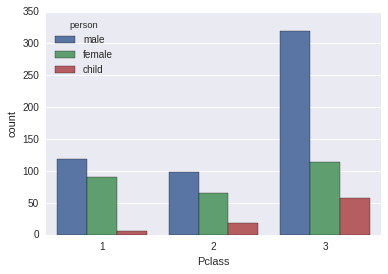

In [59]:
sns.countplot('Pclass',data=ttn_df, hue='person')

### Plot Distributions:
>* Series.hist()
>* sns.kdeplot

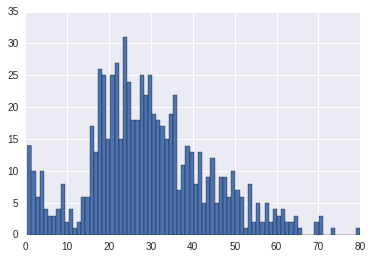

In [98]:
agediff = ttn_df.Age.max()-ttn_df.Age.min()
ttn_df['Age'].hist(bins=int(round(agediff)))


In [61]:
ttn_df.Age.mean()

29.69911764705882

In [62]:
ttn_df.person.value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

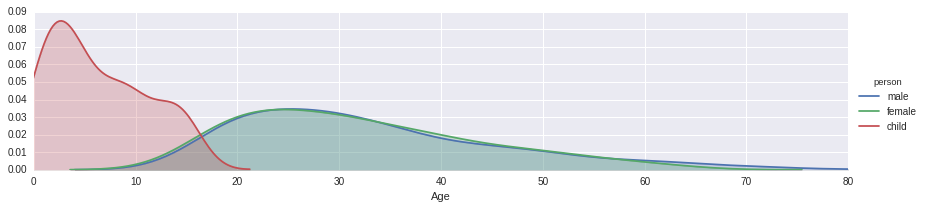

In [99]:
fig = sns.FacetGrid(ttn_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,ttn_df.Age.max()))
fig.add_legend()

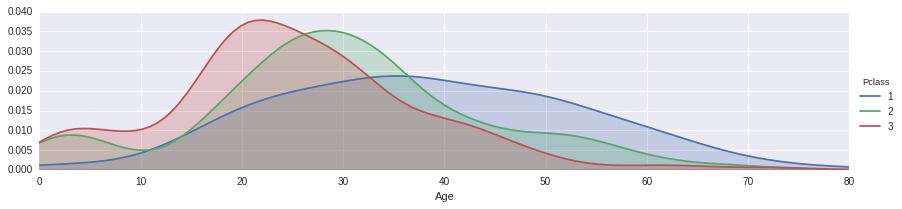

In [100]:
fig = sns.FacetGrid(ttn_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,ttn_df.Age.max()))
fig.add_legend()

In [101]:
deck = ttn_df.Cabin.dropna()

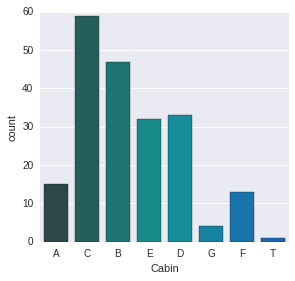

In [122]:
levels = []
for ss in deck:
    levels.append(ss[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count',order=set(levels))

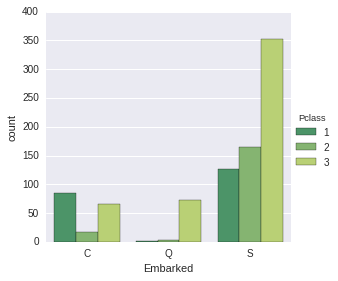

In [21]:
sns.factorplot('Embarked', hue='Pclass', data=ttn_df,kind='count',palette='summer',order=['C','Q','S'])

### Create New Column:

#### a new column can be created by directly assigning values to it DataFrame['newcolumnname'] = list/series/..

#### or mapped from another column by using Series.map({key1:val1; key2:val2})

#### values in the column can be modified according to conditions based on itself using loc[]

In [148]:
ttn_df['alone'] = ttn_df.Parch + ttn_df.SibSp
ttn_df['alone'].loc[ttn_df.alone>0] = 'with family'
ttn_df['alone'].loc[ttn_df.alone==0] = 'alone'

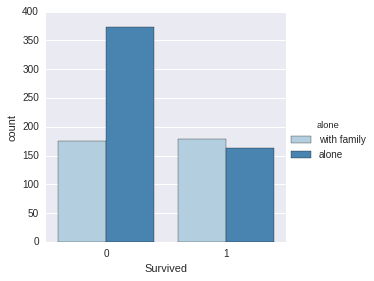

In [150]:
sns.factorplot('Survived',kind='count',data=ttn_df, palette='Blues', hue='alone')

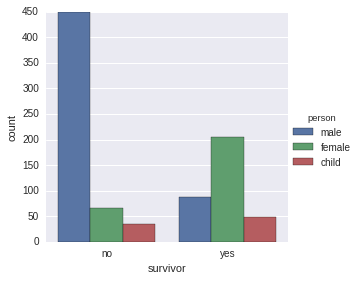

In [105]:
ttn_df['survivor'] = ttn_df.Survived.map({0:'no', 1:'yes'})

sns.factorplot('survivor',kind='count', data=ttn_df, hue='person')

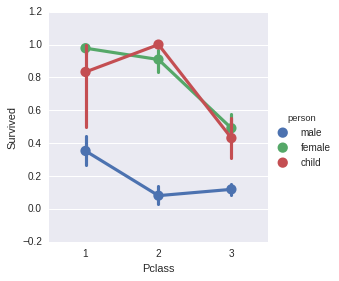

In [25]:
sns.factorplot('Pclass','Survived',data=ttn_df,hue='person')

### Linear Regression:

> * seaborn.lmplot()
> * _jitter
> * _bins

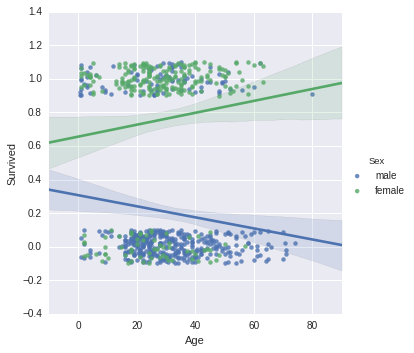

In [26]:
sns.lmplot('Age','Survived',data=ttn_df,hue='Sex',y_jitter=0.1)

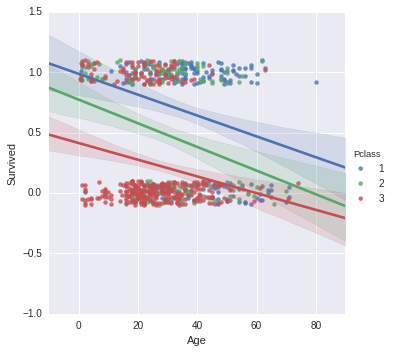

In [137]:
sns.lmplot('Age','Survived',data=ttn_df,hue='Pclass',y_jitter=0.1)

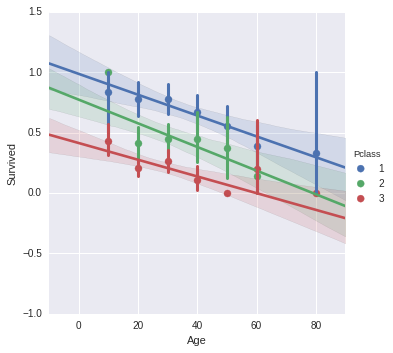

In [27]:
generations = [10,20,30,40,50,60,80]
sns.lmplot('Age','Survived',data=ttn_df,hue='Pclass',x_bins=generations)

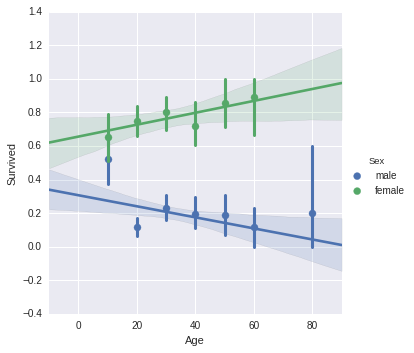

In [140]:
sns.lmplot('Age','Survived',data=ttn_df,hue='Sex',x_bins=generations)

In [108]:
cab = ttn_df.Cabin.copy()
for idx in cab.index:
    if isinstance(cab[idx], basestring):
        cab[idx] = cab[idx][0]
    else:
        cab[idx] = 'NAN'
ttn_df['level'] = cab

In [144]:
def cablevel(cab):
    if not isinstance(cab, basestring):
        return cab
    else:
        return cab[0]
ttn_df['level'] = ttn_df.Cabin.apply(cablevel)

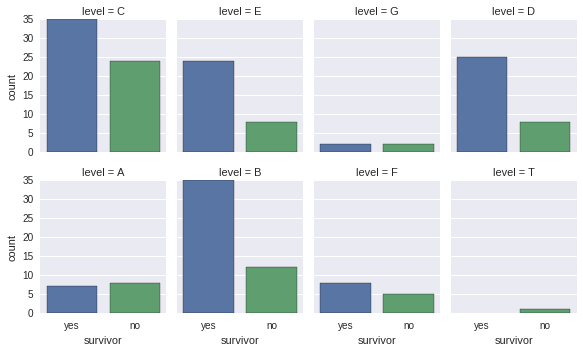

In [145]:
sns.factorplot('survivor',col='level',col_wrap=4,
               data=ttn_df[ttn_df.Cabin.notnull()],
               kind='count',aspect =0.8,size=2.5)

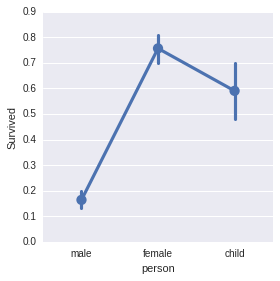

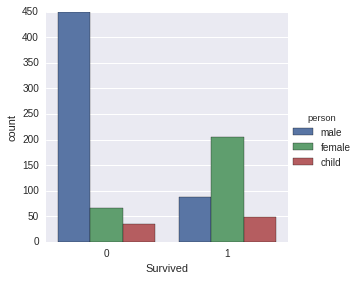

In [156]:
sns.factorplot('person','Survived',data=ttn_df)
sns.factorplot('Survived',hue='person',data=ttn_df,kind='count')

In [154]:
sns.factorplot('person','Survived',data=ttn_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,survivor,level,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,no,NaN,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,yes,C,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,yes,NaN,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,yes,C,with family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,no,NaN,alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,no,NaN,alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,no,E,alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child,no,NaN,with family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female,yes,NaN,with family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child,yes,NaN,with family
